##### Problem statement: 
    
Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

In [1]:
import pandas as pd
df= pd.read_csv('Uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [2]:
df= df.drop(columns=['Unnamed: 0', 'key'], inplace= False)

In [3]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


# Null value treatment

In [4]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(how='any',inplace= True)

In [6]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

# Outlier detection

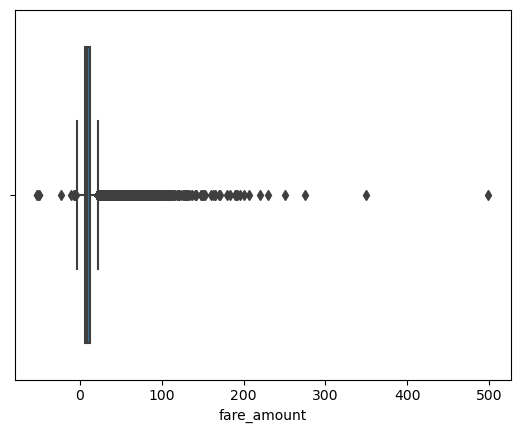

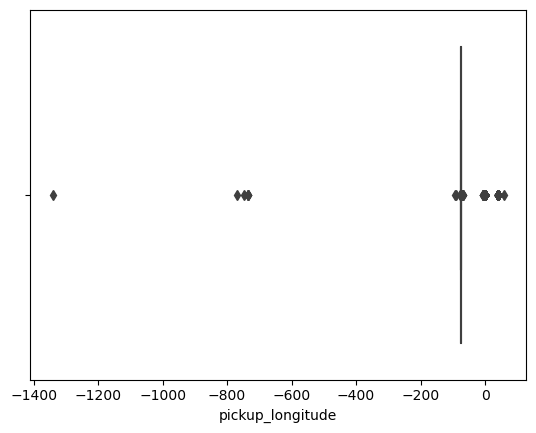

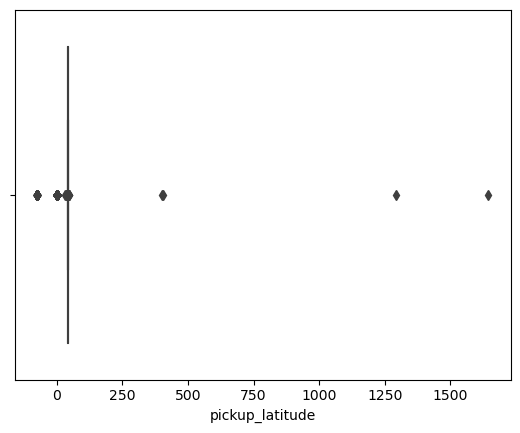

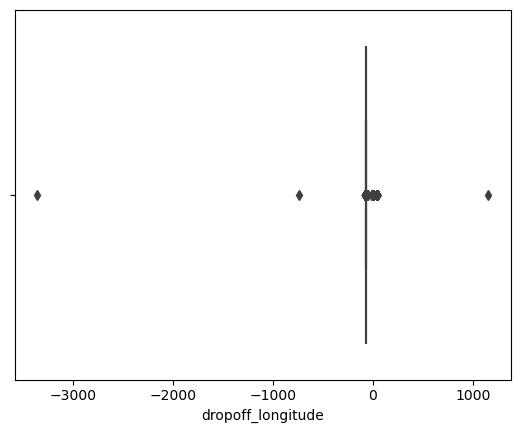

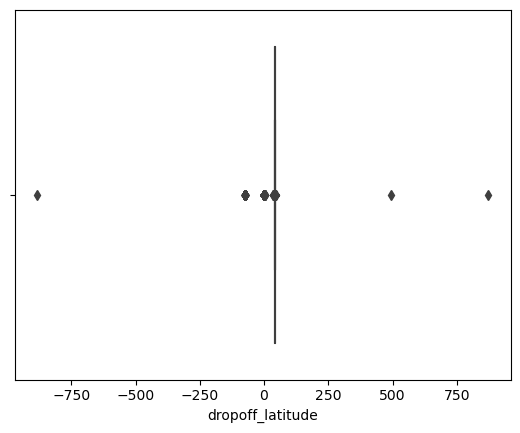

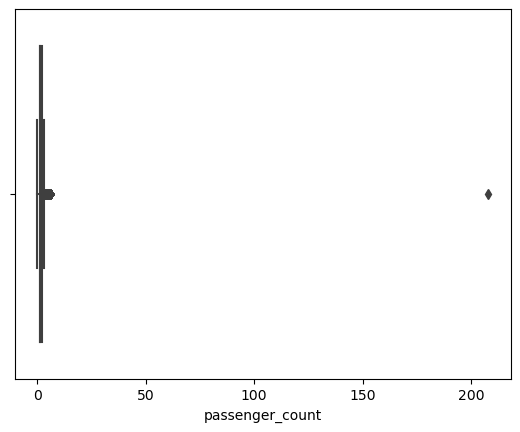

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(exclude=['object']):
    plt.figure()
    sns.boxplot(data=df, x=col)

# Dropping outliers

In [8]:
df= df[
    (df.pickup_latitude>-90)&(df.pickup_latitude<90)&
    (df.dropoff_latitude>-90)&(df.dropoff_latitude<90)&
    (df.pickup_longitude>-180)&(df.pickup_longitude<180)&
    (df.dropoff_longitude>-180)&(df.dropoff_longitude<180)&
    (df.fare_amount>0)&(df.passenger_count>0)&(df.passenger_count<50)
]

# Distance calculation

In [9]:
from math import radians, sin, cos, atan2, sqrt
import numpy as np

def distance(lat1, lon1, lat2, lon2):
    lat1= lat1.apply(radians)
    lon1= lon1.apply(radians)
    lat2= lat2.apply(radians)
    lon2= lon2.apply(radians)
    
    dlat= lat2-lat1
    dlon= lon2-lon1
    
    a= (np.sin(dlat/2)**2)+np.cos(lat1)*np.cos(lat2)*(np.sin(dlon/2)**2)
    c= 2*np.arctan2(np.sqrt(a),np.sqrt(1-a))
    
    km= 6371*c
    
    return km

In [10]:
temp= distance(df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude'])
newdf= df.copy()
newdf['Distance']= temp
df= newdf
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Distance
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450
...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1,0.112210
199996,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1,1.875050
199997,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2,12.850319
199998,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1,3.539715


<Axes: xlabel='Distance'>

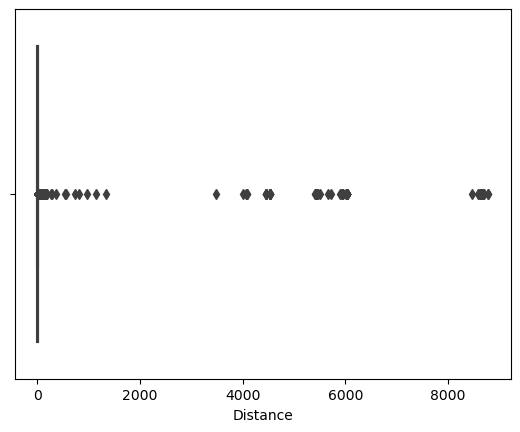

In [11]:
sns.boxplot(data=df, x='Distance')

In [12]:
df= df[(df['Distance']>0)&(df['Distance']<200)]

<Axes: xlabel='Distance'>

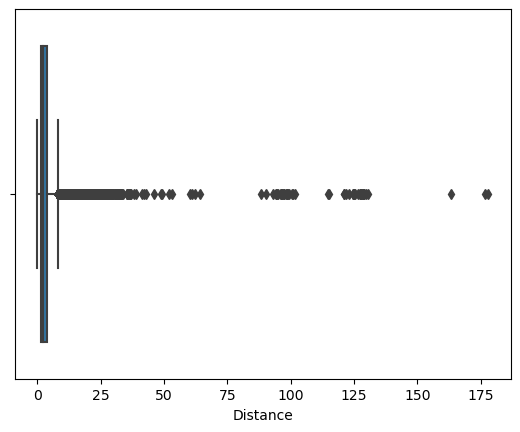

In [13]:
sns.boxplot(data=df, x='Distance')

# Creating training and testing datasets

In [14]:
from sklearn.preprocessing import StandardScaler
x= df[['Distance']].values
y= df['fare_amount'].values.reshape(-1,1)

In [15]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest= train_test_split(x,y,random_state=10)

In [16]:
stdx= StandardScaler()
xtrain= stdx.fit_transform(xtrain)
xtest= stdx.transform(xtest)
stdy= StandardScaler()
ytrain= stdy.fit_transform(ytrain)
ytest= stdy.transform(ytest)

# Linear Model

In [17]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [18]:
ypred= model.predict(xtest)

# Linear Model Accuracy

In [19]:
from sklearn.metrics import r2_score, mean_squared_error
r2= r2_score(ytest,ypred)
RMSE= mean_squared_error(ytest,ypred, squared=False)
print(r2,RMSE)

0.6041167920841168 0.6290054895695946


# Random Forest Regression Model

In [23]:
from sklearn.ensemble import RandomForestRegressor
regmodel= RandomForestRegressor()
regmodel.fit(xtrain, ytrain)

/var/folders/0d/gc5_0_856sz2bp0wvvblvnp00000gn/T/ipykernel_14113/1686080199.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regmodel.fit(xtrain, ytrain)


RandomForestRegressor()

In [24]:
regypred= regmodel.predict(xtest)

# Random Forest Model Accuracy

In [25]:
_r2= r2_score(ytest,regypred)
_RMSE= mean_squared_error(ytest,regypred, squared=False)
print(_r2,_RMSE)

0.6524897702111214 0.5893247655913172
